# Baseline

Este `notebook` tem por finalidade introduzir o modelo baseline e o desempenho mínimo esperado de outros modelos. 

O modelo baseline é um modelo simples para determinar a linha de base do desempenho de modelos mais complexos. Para o dataset que estamos utilizando, o baseline será feito atribuindo a moda como previsão de todas as observações. Essa aproximação foi escolhida em razão do desbalanceamento do target do conjunto de dados escolhidos, estabelecendo, portanto, uma acurácia base maior para desempenho de outros modelos, mas também interpretações de um F1-score - que associa a precisão e a sensibilidade - que não reflete o bom desempenho esperado pela métrica da acurácia.

In [37]:
#Todos os módulos e funções importados para o funcionamento do presente notebook
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from matplotlib import cm

## Importando o `dataframe`

O dataframe que iremos utilizar será aquele já tratado e dividido previamente no notebook `Tratamento_geral`.

In [30]:
features_treino = pd.read_csv('Features para treino.csv', index_col='Unnamed: 0', sep=',' )
features_teste = pd.read_csv('Features para teste.csv', index_col='Unnamed: 0', sep=',' )
target_treino = pd.read_csv('Target para treino.csv', index_col='Unnamed: 0', sep=',' )
target_teste = pd.read_csv('Target para teste.csv', index_col='Unnamed: 0', sep=',' )

## Aplicando o modelo `baseline`

Abaixo utilizaremos a ferramenta `DummyClassifier` do módulo `scikit-learn` para aplicar o baseline. Essa ferramenta baseia-se apenas nos _dados de target_ de treino para realizar a previsão, ignorando o imput de atributos. 

In [31]:
x_treino = features_treino 
y_treino = target_treino

#Cria-se a instância do modelo
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_treino, y_treino)

x_teste = features_teste
y_verdadeiro = target_teste

#Aplicação do modelo aos dados de teste
y_previsto = dummy_clf.predict(x_teste)

## Desempenho

Para análise de desempenho do modelo, a acurácia e o F1-score serão calculados. O gráfico da matriz de confusão também será apresentado.

In [39]:
print(classification_report(y_verdadeiro, y_previsto, zero_division=0.0))

              precision    recall  f1-score   support

     Control       0.73      1.00      0.84        61
    Impaired       0.00      0.00      0.00        23

    accuracy                           0.73        84
   macro avg       0.36      0.50      0.42        84
weighted avg       0.53      0.73      0.61        84



Observando as métricas de desempenho, é possível notar a discrepância entre acurácia e recall, considerando a classe `Impaired` como positiva. Aqui, a acurácia reflete mais a _distribuição_ de labels do dataframe do que os _acertos de previsão_. Para melhor análise da sensibilidade e seu valor **muito baixo**, pode-se plotar o gráfico de matriz de confusão.

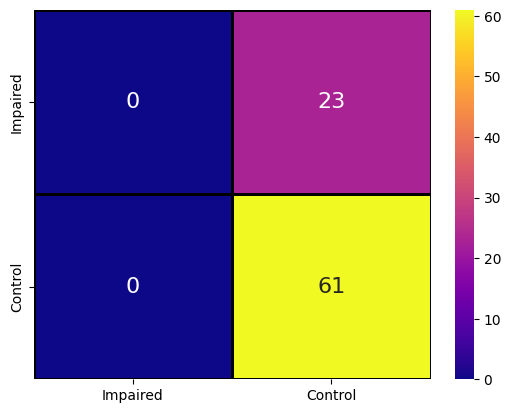

In [34]:
#Obtenção dos labels
labels = y_verdadeiro["Class"].unique().tolist()

#Obtenção da matrix de confusão
matriz_conf = confusion_matrix(y_verdadeiro, y_previsto, labels=labels)
df_conf = pd.DataFrame(matriz_conf, labels, labels)

#Plotagem do gráfico
sns.heatmap(df_conf, cmap=cm.plasma, annot=True, annot_kws={"size": 16}, linewidths=1, linecolor='black');

Como esperado, nota-se que, em razão do desbalanceamento do dataframe, todos os labels atribuidos erroneamente foram aqules atribuidos à classe `Impaired` - a _minoria_ entre os targets. Dessa forma, é possível compreender de maneira visual o resultado igual a 0 do F1-score, baseado no cálculo [2].

A partir dos resultados do modelo baseline, espera-se que os demais modelos apresentem acurácia maior que $0.73$ e recall maior que $0.0$

## Referências

[1] **Megahed, F.M., Chen, YJ., Jones-Farmer, L.A. et al.** Comparing classifier performance with baselines. _Nat Methods_, 21, 546–548 (2024). DOI: https://doi.org/10.1038/s41592-024-02234-5

[2] Documentação do F1-score, Scikit-learn. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html